# Decision Tree Classifier

### Read the dataset

In [139]:
import pandas as pd
df = pd.read_csv('E:/Deployment2/repository/iris.csv')

In [140]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [142]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [143]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [144]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### Label encoding the target feature

In [145]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [146]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Seperate Dependent and Independent features

In [147]:
X = df.drop(labels=['species'],axis=1)
Y = df[['species']]

In [148]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [149]:
Y.head()

,species
0,0
1,0
2,0
3,0
4,0


### Train Test split

In [150]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.3,random_state=21)

In [151]:
xtrain.shape

(105, 4)

In [152]:
xtest.shape

(45, 4)

### Building a Decision tree Classifier

In [153]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2,criterion='entropy')
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

[Text(0.4, 0.8333333333333334, 'petal_width <= 0.8\nentropy = 1.585\nsamples = 105\nvalue = [36, 34, 35]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 36\nvalue = [36, 0, 0]'),
 Text(0.6, 0.5, 'petal_length <= 4.95\nentropy = 1.0\nsamples = 69\nvalue = [0, 34, 35]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.31\nsamples = 36\nvalue = [0, 34, 2]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

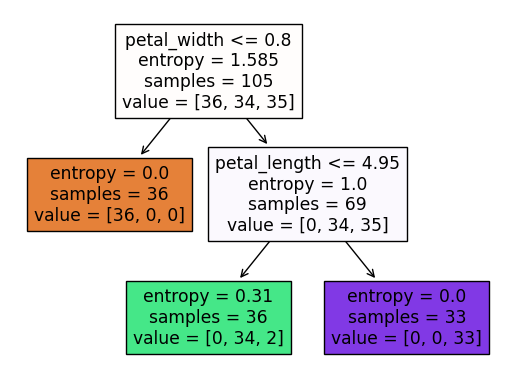

In [154]:
from sklearn.tree import plot_tree
plot_tree(model,feature_names=xtrain.columns,filled=True)

In [155]:
ytrain.value_counts()

species
0          36
2          35
1          34
Name: count, dtype: int64

## Evaluate the model

In [156]:
model.score(xtrain,ytrain)

0.9809523809523809

In [157]:
model.score(xtest,ytest)

0.8666666666666667

In [158]:
from sklearn.metrics import confusion_matrix
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)
cf = confusion_matrix(ytest,ypred_ts)
cf

array([[14,  0,  0],
       [ 0, 14,  2],
       [ 0,  4, 11]], dtype=int64)

<Axes: >

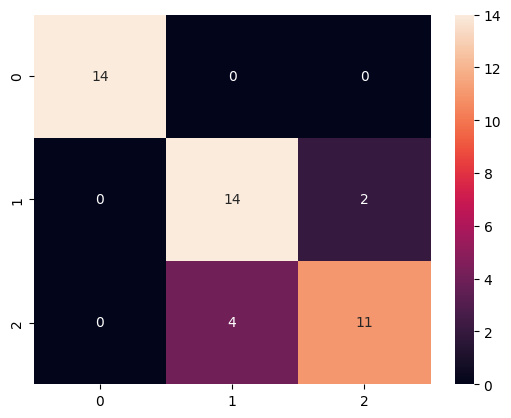

In [159]:
import seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')

In [160]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.78      0.88      0.82        16
           2       0.85      0.73      0.79        15

    accuracy                           0.87        45
   macro avg       0.87      0.87      0.87        45
weighted avg       0.87      0.87      0.87        45



In [161]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model,xtrain,ytrain,cv=5,scoring='accuracy')
scores

array([0.9047619 , 0.95238095, 1.        , 1.        , 0.9047619 ])

In [162]:
scores.mean()

0.9523809523809523

In [163]:
scores2 = cross_val_score(model,xtrain,ytrain,scoring='f1_macro')
scores2

array([0.8968254 , 0.95213675, 1.        , 1.        , 0.9047619 ])

In [164]:
scores2.mean()

0.9507448107448108

### Hyperparameter tuning : GridSearchCV
1. Max Depth
2. Min Samples Split
3. Min Samples Leaf
4. Criterion : Gini, Entropy

In [165]:
params = {'max_depth':[2,3,4,5],
          'min_samples_split':[6,7,8,9,10],
          'criterion':['entropy','gini']}

In [166]:
from sklearn.model_selection import GridSearchCV
model1 = DecisionTreeClassifier()
gscv = GridSearchCV(model1,param_grid=params,cv=5,scoring='f1_macro')
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 3, 4, 5],
                         'min_samples_split': [6, 7, 8, 9, 10]},
             scoring='f1_macro')

In [167]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 6}

In [168]:
gscv.best_score_

0.9897435897435898

In [169]:
best_model = gscv.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=6)

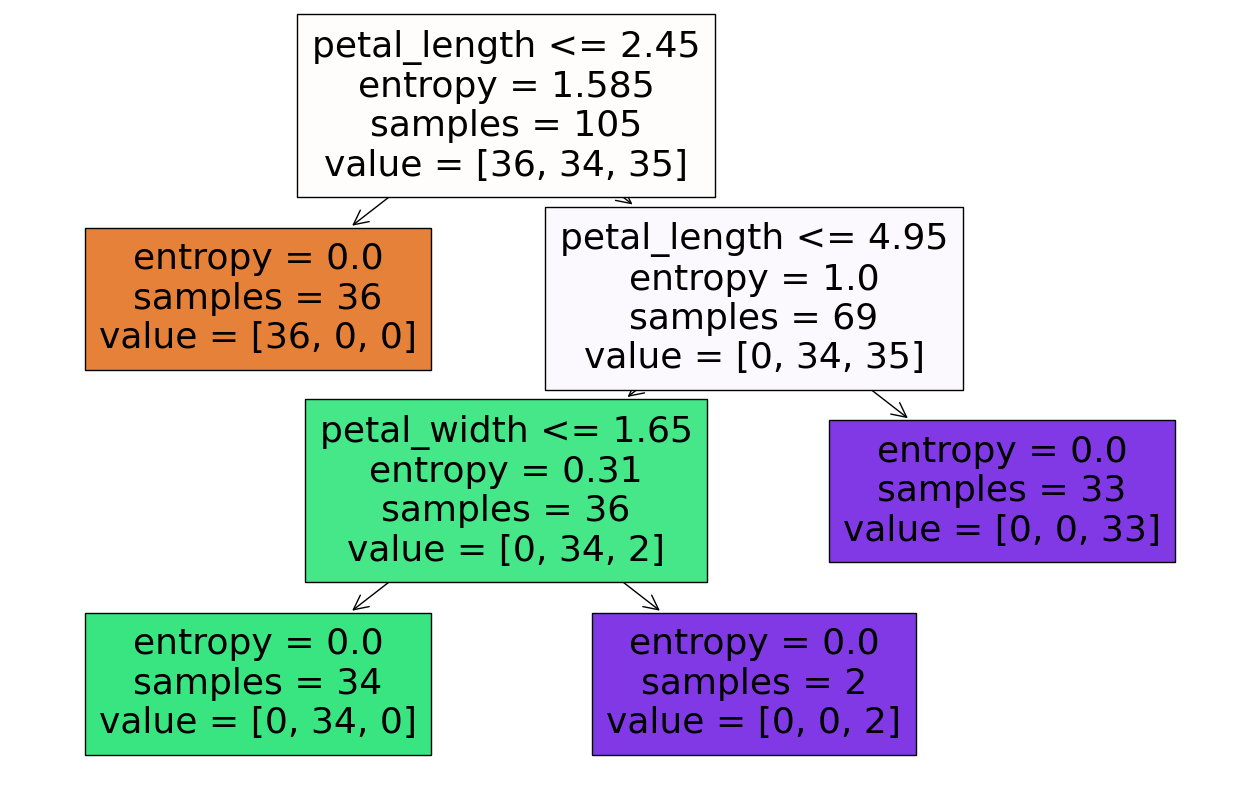

In [170]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10))
plot_tree(best_model,feature_names=xtrain.columns,filled=True)
plt.show()

In [171]:
ypred_tr1 = gscv.predict(xtrain)
ypred_ts1 = gscv.predict(xtest)

<Axes: >

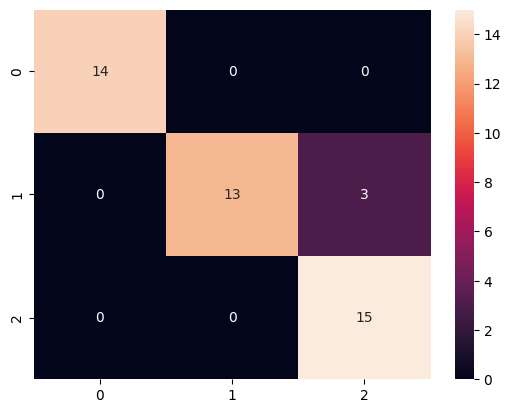

In [172]:
cf1 = confusion_matrix(ytest,ypred_ts1)
sns.heatmap(cf1,annot=True,fmt='d')

In [173]:
print(classification_report(ytest,ypred_ts1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.81      0.90        16
           2       0.83      1.00      0.91        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.94      0.93      0.93        45



### Probability for every class

In [174]:
best_model.predict_proba(xtest)

array([[0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]])

### Inverse transform 

In [175]:
tr_class = le.inverse_transform(ypred_tr1)
tr_class

array(['setosa', 'setosa', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'setosa', 'virginica', 'setosa', 'setosa', 'setosa',
       'setosa', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'virginica', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'virginica', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa

In [176]:
ts_class = le.inverse_transform(ypred_ts1)
ts_class

array(['versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'virginica', 'setosa',
       'virginica', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'setosa',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'setosa', 'virginica',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'versicolor', 'virginica'],
      dtype=object)